# <center> Shearlab_odl_test </center>

In [3]:
import odl
import sys
sys.path.append('../')
import shearlab_operator
import odl.contrib.pyshearlab

In [4]:
def tic():
    #Homemade version of matlab tic and toc functions
    import time
    global startTime_for_tictoc
    startTime_for_tictoc = time.time()

def toc():
    import time
    if 'startTime_for_tictoc' in globals():
        print("Elapsed time is " + str(time.time() - startTime_for_tictoc) + " seconds.")
    else:
        print("Toc: start time not set")

In [5]:
space = odl.uniform_discr([-1, -1], [1, 1], [512,512])

In [6]:
tic()
op_pyshearlab = odl.contrib.pyshearlab.PyShearlabOperator(space, num_scales=4)
toc()

Elapsed time is 48.037967920303345 seconds.


In [7]:
tic()
op_shearlab = shearlab_operator.ShearlabOperator(space, num_scales=4)
toc()

Elapsed time is 24.172470092773438 seconds.


In [8]:
phantom = odl.phantom.shepp_logan(space, True)

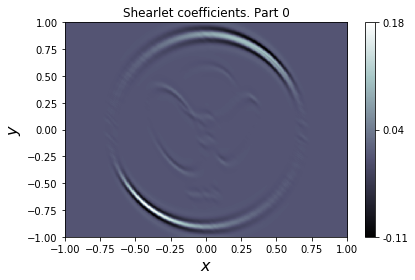

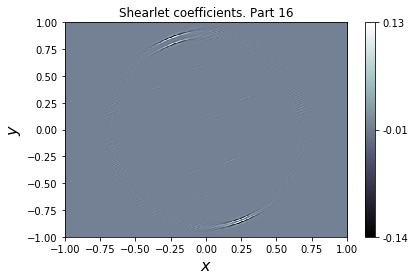

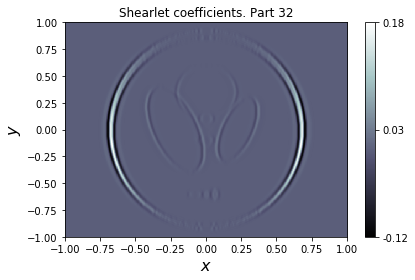

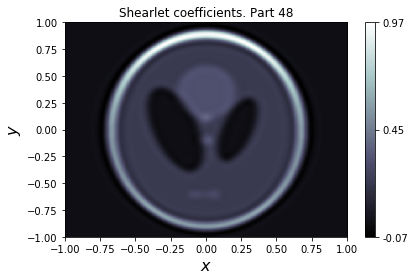

(<matplotlib.figure.Figure at 0x2b409281cfd0>,
 <matplotlib.figure.Figure at 0x2b40928d7470>)

In [12]:
y_shearlab = op_shearlab(phantom)
y_shearlab.show('Shearlet coefficients')

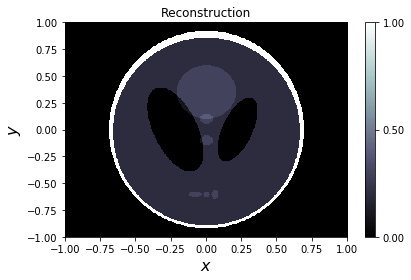

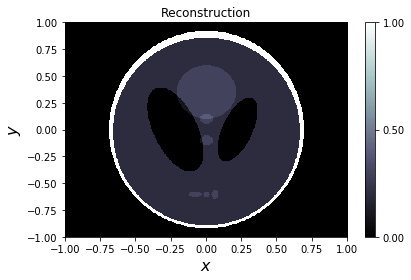

In [10]:
z_shearlab = op_shearlab.inverse(y_shearlab)
z_shearlab.show('Reconstruction')

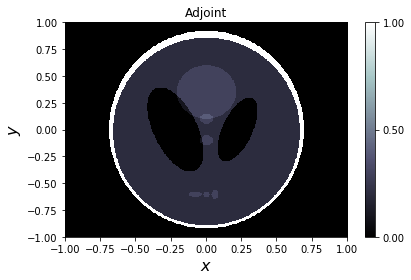

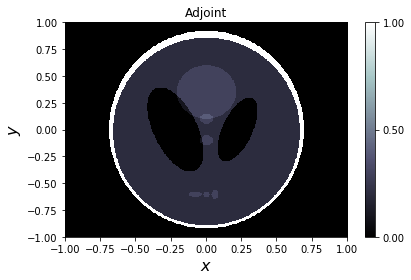

In [11]:
z_shearlab = op_shearlab.adjoint(y_shearlab)
z_shearlab.show('Adjoint')